<h1>Project 5 : Expectation Maximization</h1>

<h1>1D Case</h1>

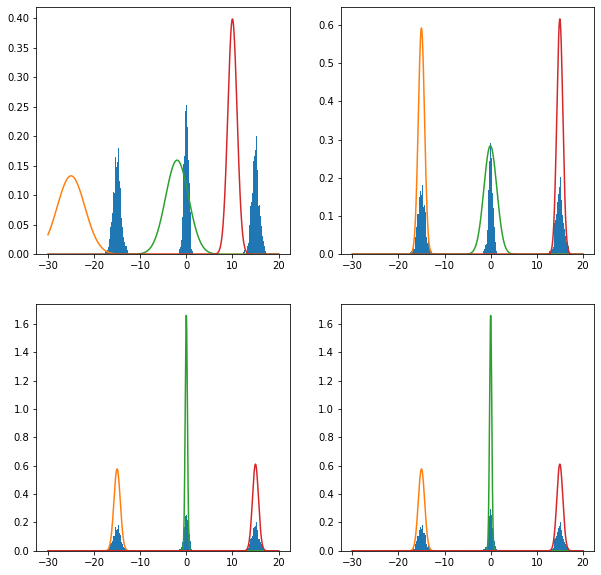

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import matplotlib.pyplot as plt
# Arthur Skok Dan Brody Danny Hong

# Implement EM on a Gaussian mixture model in 1 and 2 dimensions. 
# For the 1-D case, use K = 3, the choice of means, covariance and pi is up to you. 
# The algorithm is laid out explicitly in equations 9.23-9.28.


# Produce a plot that shows a histogram of your generated observations, and overlay on that 
# histogram the pdf you found. Plot this at algorithm init, and a couple other times as the algorithm converges.
# If you feel ambitious make a movie. If you want to see the algorithm break, artificially introduce a data point
# that exactly equals one of the means of the distribution.
N = 1000
K = 3
data_mu = [-15, 0, 15]
data_sig = [.8, .5, .8]
data_class_1 =  np.random.normal(data_mu[0],data_sig[0],N)
data_class_2 =  np.random.normal(data_mu[1],data_sig[1],N)
data_class_3 =  np.random.normal(data_mu[2],data_sig[2],N)

data = np.sort(np.concatenate([data_class_1, data_class_2, data_class_3]))
labels = np.concatenate([np.zeros_like((data_class_1)), np.ones_like((data_class_2)), np.ones_like((data_class_3))*2])

mu = [-25, -2, 10]
sig = [3,2.5, 1]
pi = [.3, .2, .5]


x_axis = np.linspace(0, np.max(data), N * K)

x = np.linspace(-30, 20, 1000)

def gamma(pi, sig, mu):
  num = np.array([pi[i]*(norm.pdf(data,mu[i], sig[i])) for i in range(3)])
  gam = num / np.sum(num,axis = 0)


  return gam

def create_targets(mu_new, cov_new, new_pi, data,K):

  probs = gamma(new_pi, cov_new, mu_new)
  
  probs = np.reshape(probs, (-1,K))



  return np.argmax(probs, axis = 1)

    
def expectation_maximization(iterations,pi,sig,mu,K,N):
  x = np.linspace(-10, 70, 3000)

  mus = [mu]
  sigs = [sig]
  pis = [pi]
  mses = [K] #worst case

  for it in range(iterations):
    #Equation 9.27
    temp_gam = gamma(pi, sig, mu)

    N_k = np.array([np.sum(temp_gam[i]) for i in range(K)])
  
    #Equation 9.24
    mu_new = np.array([np.sum((temp_gam[n]) * data) for n in range(K)])/N_k

    mus.append(mu_new)

    #Equation 9.25
    
    cov_new = np.array([np.sum((temp_gam[i]*(data-mu_new[i])*(data-mu_new[i]).T)) for i in range(3)]) / N_k

    sigs.append(cov_new)

    #Equation 9.26
    new_pi = N_k/N

    pis.append(new_pi)

    targets =  create_targets(mu_new, cov_new, new_pi, data,K)
    mse = np.mean((targets - labels)**2)

    mses.append(mse)

    pi = new_pi
    sig = cov_new
    mu = mu_new

  return mus,sigs,pis,mses


iterations = 3

mus,sigs,pis,mses = expectation_maximization(iterations,pi,sig,mu,K,N)

fig, axes = plt.subplots(nrows = int((iterations+1)/2), ncols = 2, figsize = (10,10))

for j in range(iterations+1):
  axes[j//2][j%2].hist(data, 200, density = True)
  for i in range (K):
    axes[j//2][j%2].plot(x, norm.pdf(x, mus[j][i], sigs[j][i])) 

# 2D Case

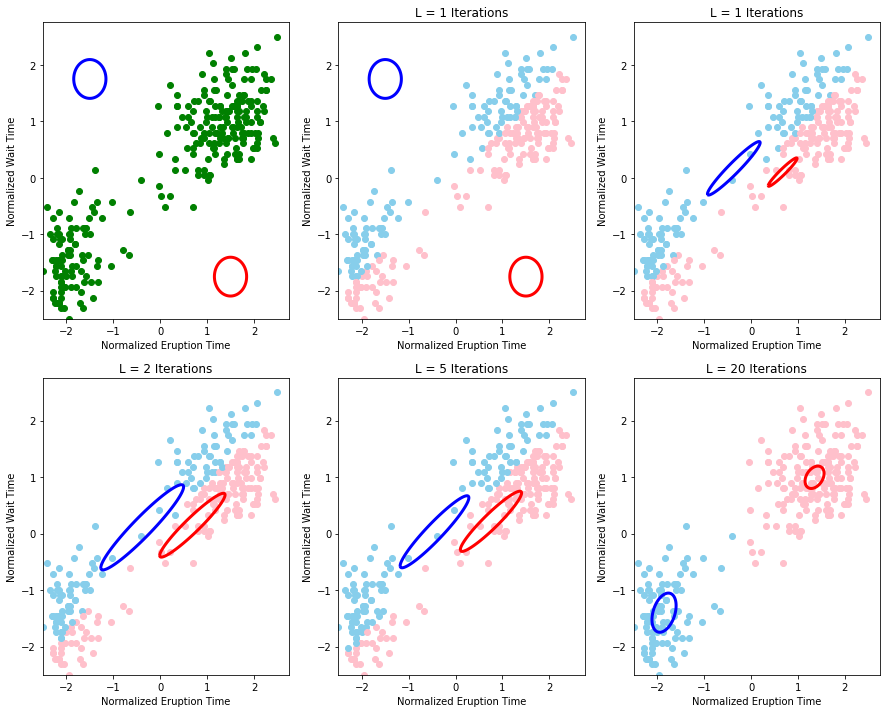

In [ ]:
#For 2-D, create a plot similar to 9.8. Use the old faithful dataset and K = 2.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy.stats import multivariate_normal
import pandas as pd
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

figure, axarr = plt.subplots(nrows=2, ncols=3, figsize=[15,12])
for axis in axarr.flat:
  axis.set(xlabel='Normalized Eruption Time', ylabel='Normalized Wait Time')
  
K = 2
# get old faithful data
with open("faithful.csv") as file_name:
    array = np.loadtxt(file_name, delimiter=",")


X = array
# rescaling the data to fit in a range of -2.5 to 2.5
scaler = MinMaxScaler(feature_range=(-2.5, 2.5))
normalized_data = scaler.fit_transform(X)
X = normalized_data
N = len(array)
data = np.zeros((N,2))
# inputting csv file data into vector for usage

# data is not yet classified at this point, represented by green circles
for i in range(N):
    data[i,0] = float(X[i,0])
    data[i,1] = float(X[i,1])
    axarr[0,0].plot(data[i,0],data[i,1], 'o', color = 'green')




# thank you to Michael for help with the plotting structure
# used to plot the dots with specified color based off gamma
def plotting_data(gammas, mu, sig, axis, N):
    # don't overwrite the green circles in first graph
    if(N != 0):
        for i in range(0, len(data)):
            alpha = np.argmax(gammas[i,:])
            if (alpha == 0):
                axis.plot(data[i,0],data[i,1], 'o', color = 'skyblue', zorder = 0)
            if (alpha == 1):
                axis.plot(data[i,0],data[i,1], 'o', color = 'pink', zorder = 0)
    # plotting the circles
    x, y = np.mgrid[-2.5:2.5:.01, -2.5:2.5:.01]
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mu[0], sig[0])
    rv2 = multivariate_normal(mu[1], sig[1])
    axis.contour(x, y, rv1.pdf(pos), colors = 'blue', levels = 0,  linewidths  = 3)
    axis.contour(x, y, rv2.pdf(pos), colors = 'red', levels = 0, linewidths  = 3)
    if(N > 0):
      axis.set_title(f'L = {N} Iterations')


def gam(pie, sig, mu):
    num = np.array([pie[i]*(multivariate_normal.pdf(data, mu[i], sig[i])) for i in range(K)]) 
    denom = num[0] + num[1]
    gamnew = np.array([np.atleast_2d(num[i]/denom)for i in range(K)])

    return gamnew


# restructing the expectation maximization algorithm for the 2D case
def expectation_maximization_2D(mu, sig, pie):
    temp_gam = gam(pie, sig, mu)
    
    #Equation 9.24
    mu_new1 = np.sum(data*temp_gam[0].T, axis=0)/np.sum(temp_gam[0], axis=1)
    mu_new2 = np.sum(data*temp_gam[1].T, axis=0)/np.sum(temp_gam[1], axis=1)

    #Equation 9.25
    sig_new1 = np.absolute((temp_gam[0]*(data-mu_new1).T@(data-mu_new1))/np.sum(temp_gam[0], axis=1))
    sig_new2 = np.absolute((temp_gam[1]*(data-mu_new2).T@(data-mu_new2))/np.sum(temp_gam[1], axis=1))
    #Equation 9.26
    pie_new1 = np.sum(temp_gam[0], axis=1)/len(data)
    pie_new2 = np.sum(temp_gam[1], axis=1)/len(data)
    
    mu_vec = [mu_new1, mu_new2]
    sig_vec = [sig_new1, sig_new2]
    pie_vec = [pie_new1, pie_new2]

    new_gams = np.concatenate((temp_gam[0].T, temp_gam[1].T), axis=1)
    return mu_vec, sig_vec, pie_vec, new_gams

# eyeing the values in figure 9.8 from the textbook:
mu_guess = [[-1.5, 1.75], [1.5, -1.75]]
sig_guess = [[[1/3, 0], [0, 1/3]], [[1/3, 0], [0, 1/3]]]
pie_guess = [1/3, 1/3]

# getting data classification for initial values
def first_It(mu, sig, pie):
  num = np.array([pie[i]*(multivariate_normal.pdf(data, mu[i], sig[i])) for i in range(K)]) 
  denom = num[0] + num[1]
  gamnew = np.array([np.atleast_2d(num[i]/denom)for i in range(K)])
  return gamnew.T

#plot guesses
plotting_data(1, mu_guess, sig_guess, axarr[0,0], 0)
plotting_data(first_It(mu_guess, sig_guess, pie_guess), mu_guess, sig_guess, axarr[0,1], 1)

#set up loop to get values at specified iteration and plot them 
mu1, sig1, pie1, gamma1 = expectation_maximization_2D(mu_guess, sig_guess, pie_guess)


plotting_data(gamma1, mu1, sig1, axarr[0, 2],1) 
for i in range(0,21):
    mu2, sig2, pie2, gamma2 = expectation_maximization_2D(mu1, sig1, pie1)
    # feeding the variables back in
    mu1 = mu2
    sig1 = sig2
    pie1 = pie2
    if (i == 2):
        plotting_data(gamma2, mu2, sig2, axarr[1,0], i) 
    if (i == 5): 
        plotting_data(gamma2, mu2, sig2, axarr[1,1], i) 
    if(i == 20):
        plotting_data(gamma2, mu2, sig2, axarr[1,2], i)
plt.show()

# as the number of iterations increases, the data reaches a point of convergence at around 20 iterations, where the circles representing the parameters stop budging, analogous to the change in the log likelihood function
# displaying little to no change between iterations. The clusters that result seem to make sense: the more time waiting for an eruption would intuitively result in a longer eruption time as lava/boiling water builds up as we wait
# the textbook suggest that EM takes a lot more time regarding computation, and it indeed seemed to be the case with there being a noticeable passage of time between running the algorithm and receiving results, even for such a 
# relatively small dataset...